In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

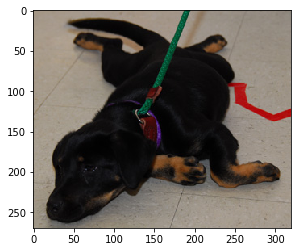

uint8


In [32]:
prac_img = cv2.imread('Data/PetImages/Dog/192.jpg')
prac_img = cv2.cvtColor(prac_img, cv2.COLOR_BGR2RGB)
plt.imshow(prac_img)
plt.show()
print(prac_img.dtype)

In [23]:
class img_trans:
    def __init__(self, img, path=None):
        self.img = img
        self.path = path
        
    def import_img(self):
        image = cv2.imread(self.path)
        rgb_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return rgb_img

    def make_bw(self):
        bw_img = cv2.cvtColor(self.img, cv2.COLOR_RGB2GRAY)
        return bw_img

    def change_bright(self, value):
        hsv = cv2.cvtColor(self.img, cv2.COLOR_RGB2HSV)
        h, s, v = cv2.split(hsv)

        lim = 255 - value
        v[v > lim] = 255
        v[v <= lim] = np.add(v[v <= lim], value, out=v[v <= lim], casting='unsafe') # have to do np.add b/c += will not accept neg

        final_hsv = cv2.merge((h, s, v))
        image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)

        return image

    def change_sat(self, value):
        hsv = cv2.cvtColor(self.img, cv2.COLOR_RGB2HSV)
        h, s, v = cv2.split(hsv)

        lim = 255 - value
        s[s > lim] = 255
        s[s <= lim] = np.add(s[s <= lim], value, out=s[s <= lim], casting='unsafe')

        final_hsv = cv2.merge((h, s, v))
        image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)

        return image 

    def change_hue(self, value):
        hsv = cv2.cvtColor(self.img, cv2.COLOR_RGB2HSV)
        h, s, v = cv2.split(hsv)

        lim = 179 - value
        h[h > lim] = 179
        h[h <= lim] = np.add(h[h <= lim], value, out=h[h <= lim], casting='unsafe')

        final_hsv = cv2.merge((h, s, v))
        image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2RGB)

        return image 

    def change_angle(self, angle, scaling=1):
        rows, cols, _ = self.img.shape

        M = cv2.getRotationMatrix2D((cols/2,rows/2), angle, scaling)
        dst = cv2.warpAffine(self.img,M,(cols,rows))

        return dst

    def gaussian_blur(self, size, sigma=0):
        blur = cv2.GaussianBlur(self.img,(size,size),sigma)

        return blur